In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.impute import KNNImputer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler, OneHotEncoder
sns.set(
    { "figure.figsize": (6, 4) },
    style='ticks',
    color_codes=True,
    font_scale=0.8
)
%config InlineBackend.figure_format = 'retina'
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('adverts.csv')

In [3]:
#Displaying the 1st 5 rows in data.
data.head()

,public_reference,mileage,reg_code,standard_colour,standard_make,standard_model,vehicle_condition,year_of_registration,price,body_type,crossover_car_and_van,fuel_type
0,202006039777689,0.0,NaN,Grey,Volvo,XC90,NEW,NaN,73970,SUV,False,Petrol Plug-in Hybrid
1,202007020778260,108230.0,61,Blue,Jaguar,XF,USED,2011.0,7000,Saloon,False,Diesel
2,202007020778474,7800.0,17,Grey,SKODA,Yeti,USED,2017.0,14000,SUV,False,Petrol
3,202007080986776,45000.0,16,Brown,Vauxhall,Mokka,USED,2016.0,7995,Hatchback,False,Diesel
4,202007161321269,64000.0,64,Grey,Land Rover,Range Rover Sport,USED,2015.0,26995,SUV,False,Diesel


In [4]:
#Checking the 'dtype' in data.
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 402005 entries, 0 to 402004
Data columns (total 12 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   public_reference       402005 non-null  int64  
 1   mileage                401878 non-null  float64
 2   reg_code               370148 non-null  object 
 3   standard_colour        396627 non-null  object 
 4   standard_make          402005 non-null  object 
 5   standard_model         402005 non-null  object 
 6   vehicle_condition      402005 non-null  object 
 7   year_of_registration   368694 non-null  float64
 8   price                  402005 non-null  int64  
 9   body_type              401168 non-null  object 
 10  crossover_car_and_van  402005 non-null  bool   
 11  fuel_type              401404 non-null  object 
dtypes: bool(1), float64(2), int64(2), object(7)
memory usage: 34.1+ MB


In [5]:
#Checing the actual rows and column present in the data
data.shape

(402005, 12)

In [6]:
# describing the data.
data.describe()

,public_reference,mileage,year_of_registration,price
count,4.020050e+05,401878.000000,368694.000000,4.020050e+05
mean,2.020071e+14,37743.595656,2015.006206,1.734197e+04
std,1.691662e+10,34831.724018,7.962667,4.643746e+04
min,2.013072e+14,0.000000,999.000000,1.200000e+02
25%,2.020090e+14,10481.000000,2013.000000,7.495000e+03
50%,2.020093e+14,28629.500000,2016.000000,1.260000e+04
75%,2.020102e+14,56875.750000,2018.000000,2.000000e+04
max,2.020110e+14,999999.000000,2020.000000,9.999999e+06


In [7]:
#finding duplicates in data
data.duplicated().sum()

0

In [8]:
#checing for the null values in data.
data.isna().sum()

public_reference             0
mileage                    127
reg_code                 31857
standard_colour           5378
standard_make                0
standard_model               0
vehicle_condition            0
year_of_registration     33311
price                        0
body_type                  837
crossover_car_and_van        0
fuel_type                  601
dtype: int64

In [9]:
#1.2.Analysis of Predictive Power of Features 


# Visualize the distributions of categorical features
# (1). Identifying Quantitative and Qualitative Features
quantitative_features = data.select_dtypes(include=['float64', 'int64']).columns.tolist()
qualitative_features = data.select_dtypes(include=['object', 'bool']).columns.tolist()
print("Quantitative Features:", quantitative_features)
print("Qualitative Features:", qualitative_features)

Quantitative Features: ['public_reference', 'mileage', 'year_of_registration', 'price']
Qualitative Features: ['reg_code', 'standard_colour', 'standard_make', 'standard_model', 'vehicle_condition', 'body_type', 'crossover_car_and_van', 'fuel_type']


In [10]:
# (2) Categorical and Numerical Columns
categorical_cols = data.select_dtypes(include=['object']).columns  
numerical_cols = data.select_dtypes(include=['int64', 'float64']).columns  # Adjust if needed

print("Categorical Columns:", categorical_cols)
print("Numerical Columns:", numerical_cols)

Categorical Columns: Index(['reg_code', 'standard_colour', 'standard_make', 'standard_model',
       'vehicle_condition', 'body_type', 'fuel_type'],
      dtype='object')
Numerical Columns: Index(['public_reference', 'mileage', 'year_of_registration', 'price'], dtype='object')


In [11]:
#(3) Checking the column names in data
print(data.columns)

Index(['public_reference', 'mileage', 'reg_code', 'standard_colour',
       'standard_make', 'standard_model', 'vehicle_condition',
       'year_of_registration', 'price', 'body_type', 'crossover_car_and_van',
       'fuel_type'],
      dtype='object')


In [12]:
# Manually specifying columns
numerical_cols = ['public_reference', 'mileage', 'year_of_registration', 'price']  # Replace with your actual numerical columns
categorical_cols = ['reg_code', 'standard_colour', 'standard_make', 'standard_model',
       'vehicle_condition', 'body_type', 'fuel_type']  # Replace with your actual categorical columns.

In [13]:
#searching for the non-numeric values in column
for col in data.columns:
    if data[col].dtype == 'object':
        # Identifying non-numeric data
        non_numeric = data[col].str.isnumeric() == False
        if non_numeric.any():
            print(f"Non-numeric values found in column {col}:")
            print(data[col][non_numeric])

Non-numeric values found in column reg_code:
25        B
280       W
312       W
426       J
667       X
         ..
401128    M
401251    M
401740    Y
401804    Y
401951    P
Name: reg_code, Length: 2915, dtype: object
Non-numeric values found in column standard_colour:
0           Grey
1           Blue
2           Grey
3          Brown
4           Grey
           ...  
402000      Grey
402001       Red
402002     White
402003       Red
402004    Silver
Name: standard_colour, Length: 396627, dtype: object
Non-numeric values found in column standard_make:
0              Volvo
1             Jaguar
2              SKODA
3           Vauxhall
4         Land Rover
             ...    
402000       Peugeot
402001       Peugeot
402002        Nissan
402003        Abarth
402004          Audi
Name: standard_make, Length: 402005, dtype: object
Non-numeric values found in column standard_model:
0                      XC90
1                        XF
2                      Yeti
3                   

In [14]:
# changing non-numeric values to NaN
data['reg_code'] = pd.to_numeric(data['reg_code'], errors='coerce')

# Replacing NaN values with a value 0.
data['reg_code'].fillna(0, inplace=True)

# result
print(data['reg_code'])


0          0.0
1         61.0
2         17.0
3         16.0
4         64.0
          ... 
402000    69.0
402001    59.0
402002    62.0
402003    65.0
402004    14.0
Name: reg_code, Length: 402005, dtype: float64


In [15]:
# changing NaN in 'year_of_registration' with 2024 where 'vehicle_condition' is "NEW"
condition_mask = (data['vehicle_condition'] == "NEW") & (data['year_of_registration'].isna())
data.loc[condition_mask, 'year_of_registration'] = 2024

# result
print(data[['vehicle_condition', 'year_of_registration']])


       vehicle_condition  year_of_registration
0                    NEW                2024.0
1                   USED                2011.0
2                   USED                2017.0
3                   USED                2016.0
4                   USED                2015.0
...                  ...                   ...
402000              USED                2019.0
402001              USED                2009.0
402002              USED                2012.0
402003              USED                2015.0
402004              USED                2014.0

[402005 rows x 2 columns]


In [16]:
# 1.3.(1)Data  Processing  for  Data  Exploration and  Visualisation
#adding car_age column in the dataset to calculate car_age.


current_year = 2024  # Assuming the current year is 2024
data['year_of_registration'] = current_year - data['car_age']

print(data[['year_of_registration', 'car_age']].head())


In [17]:
#(2) Removing the decimal
data['year_of_registration'].replace([np.inf, -np.inf, np.nan], 0, inplace=True)
data['year_of_registration'] = data['year_of_registration'].astype(int)

In [18]:
data.head()

,public_reference,mileage,reg_code,standard_colour,standard_make,standard_model,vehicle_condition,year_of_registration,price,body_type,crossover_car_and_van,fuel_type
0,202006039777689,0.0,0.0,Grey,Volvo,XC90,NEW,2024,73970,SUV,False,Petrol Plug-in Hybrid
1,202007020778260,108230.0,61.0,Blue,Jaguar,XF,USED,2011,7000,Saloon,False,Diesel
2,202007020778474,7800.0,17.0,Grey,SKODA,Yeti,USED,2017,14000,SUV,False,Petrol
3,202007080986776,45000.0,16.0,Brown,Vauxhall,Mokka,USED,2016,7995,Hatchback,False,Diesel
4,202007161321269,64000.0,64.0,Grey,Land Rover,Range Rover Sport,USED,2015,26995,SUV,False,Diesel


In [19]:
# 2.  Data   Processing   for  Machine Learning.
# 2.1.   Dealing  with  Missing  Values,  Outliers, and  Noise  #removing quartiles from mileage.
#removing outliers in column 'mileage'
Q1 = data['mileage'].quantile(0.25)
Q3 = data['mileage'].quantile(0.75)
IQR = Q3 - Q1
outliers = data[(data['mileage'] < (Q1 - 1.5 * IQR)) | (data['mileage'] > (Q3 + 1.5 * IQR))]
median_value = data['mileage'].mode().iloc[0]
data['mileage'] = np.where((data['mileage'] < (Q1 - 1.5 * IQR)) | (data['mileage'] > (Q3 + 1.5 * IQR)), median_value, data['mileage'])

LinAlgError: SVD did not converge in Linear Least Squares

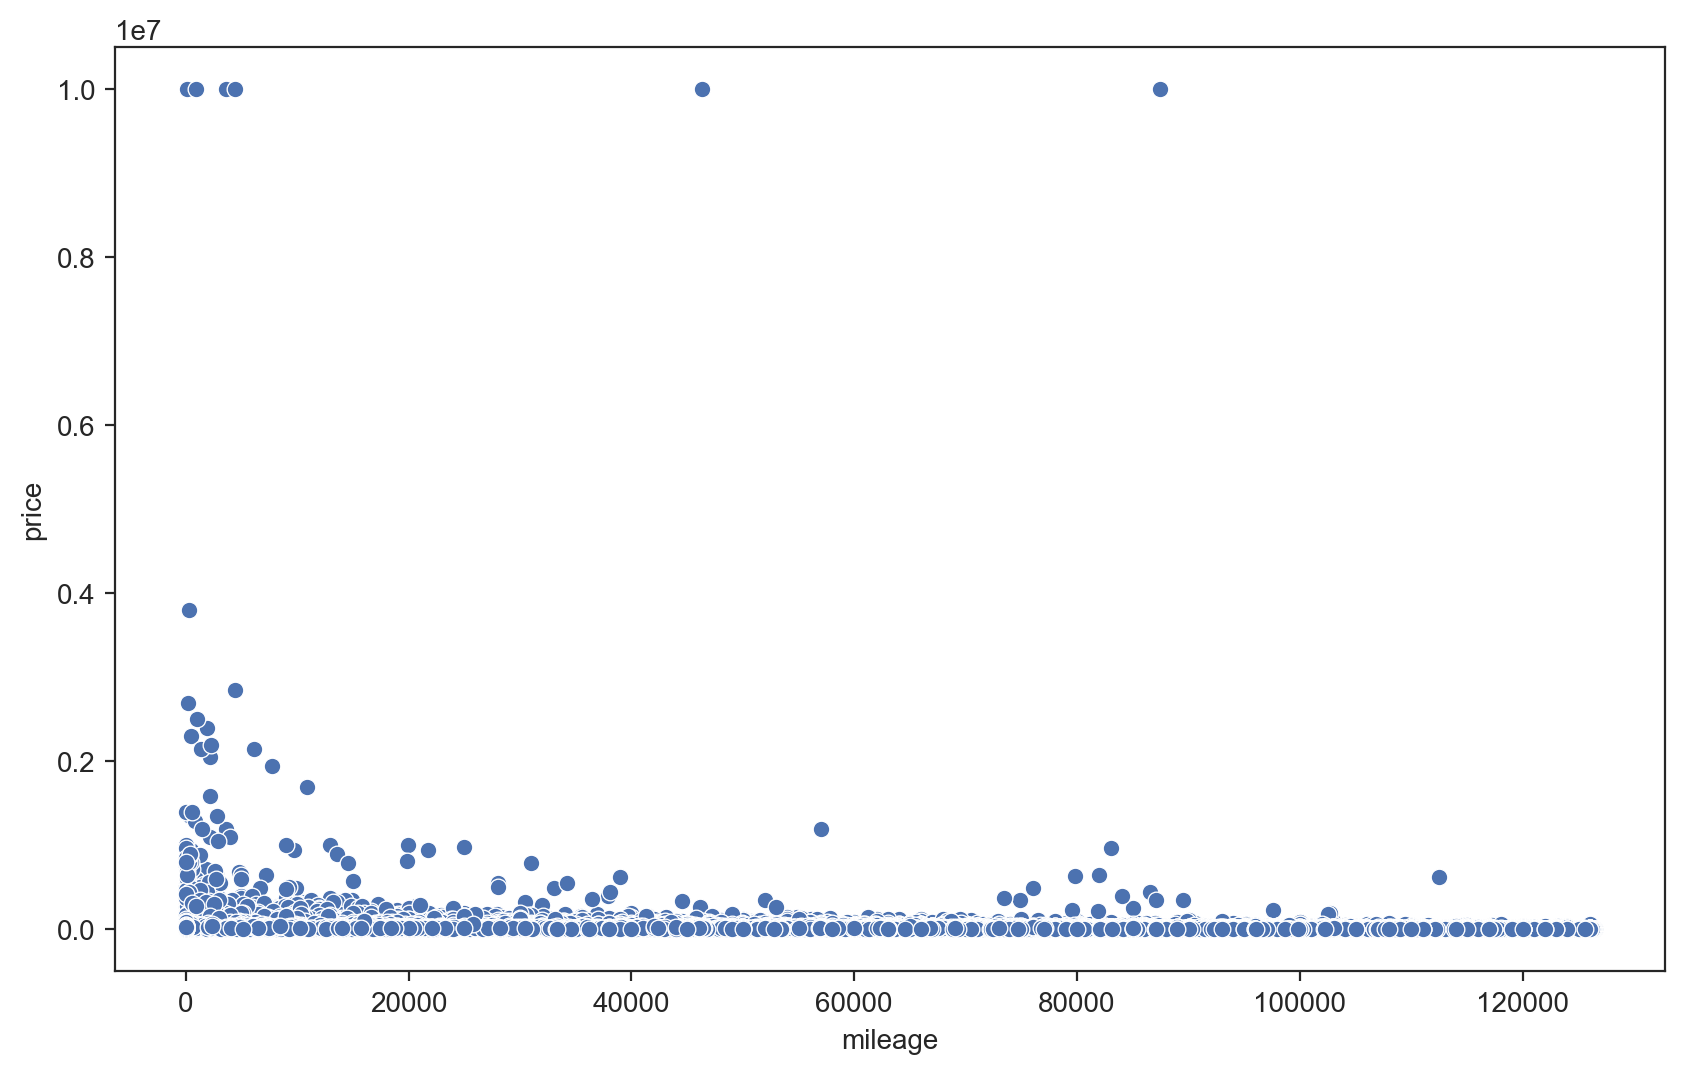

In [20]:
#2.3 Plotting scatter plot.

def plot_scatter_with_fit_line(data, feature_column, target_column):
    
    feature_column = 'mileage' 
    target_column = 'price'     
    
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x='mileage', y='price', data=data)
    
# Calculating and plotting the best-fit line

    m, b = np.polyfit(data['mileage'], data['price'], 1)
    plt.plot(data['mileage'], m * data[feature_column] + b, color='red')

    plt.title(f'Scatter Plot with Best-Fit Line: {mileage} vs {price}')
    plt.xlabel('mileage')
    plt.ylabel('price')
    plt.show()

plot_scatter_with_fit_line(data, 'mileage', 'price')

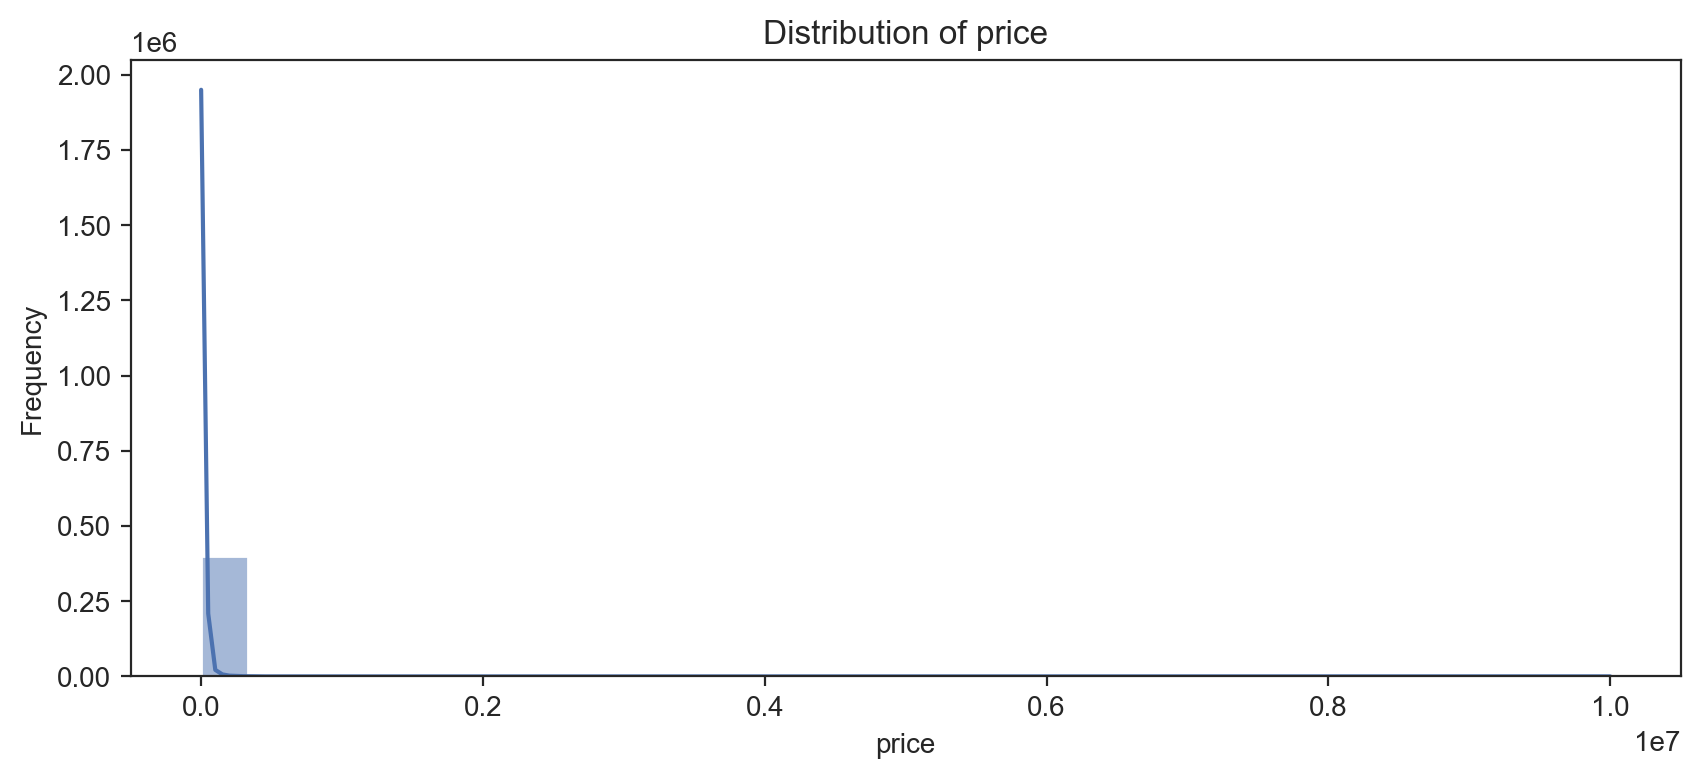

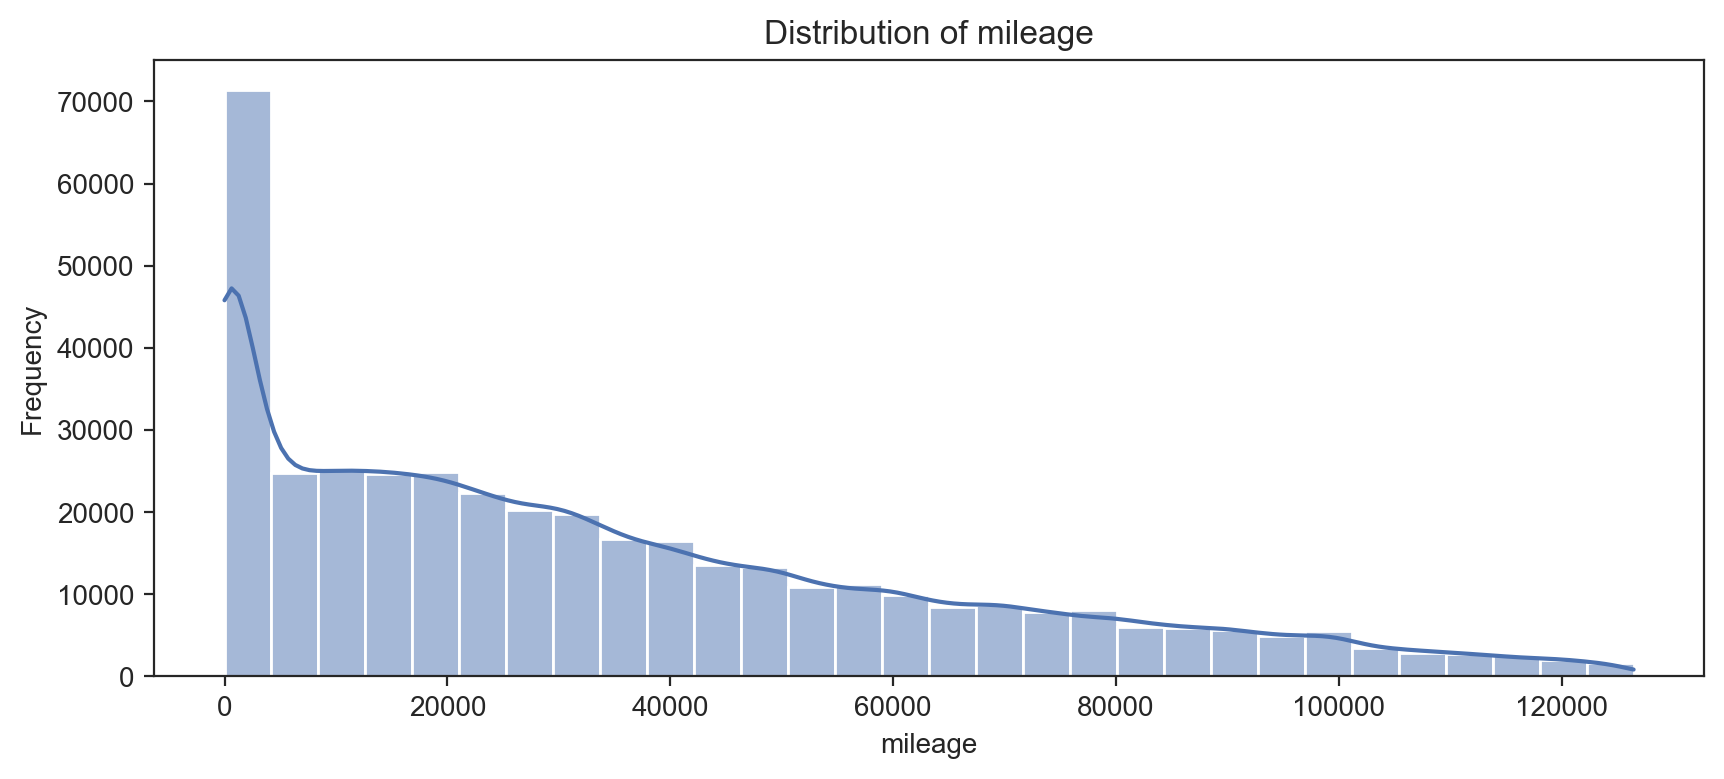

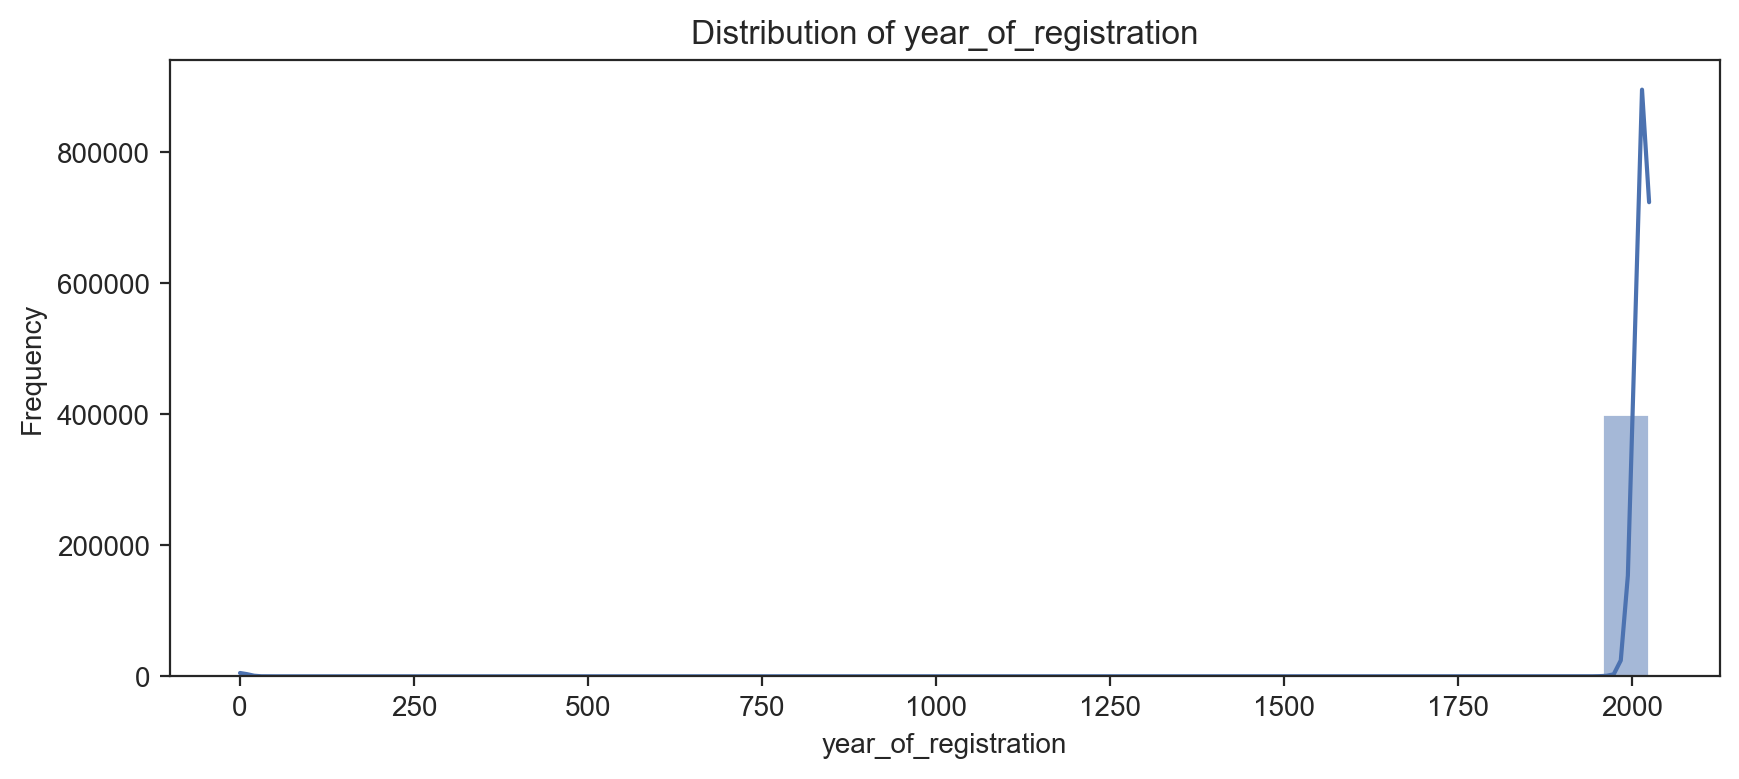

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns
def plot_distributions(data, columns):
    for col in columns:
        plt.figure(figsize=(10, 4))
        sns.histplot(data[col], kde=True, bins=30)
        plt.title(f'Distribution of {col}')
        plt.xlabel(col)
        plt.ylabel('Frequency')
        plt.show()

columns_to_plot = ['price', 'mileage','year_of_registration']  
plot_distributions(data, columns_to_plot)

NameError: name 'target_variable' is not defined

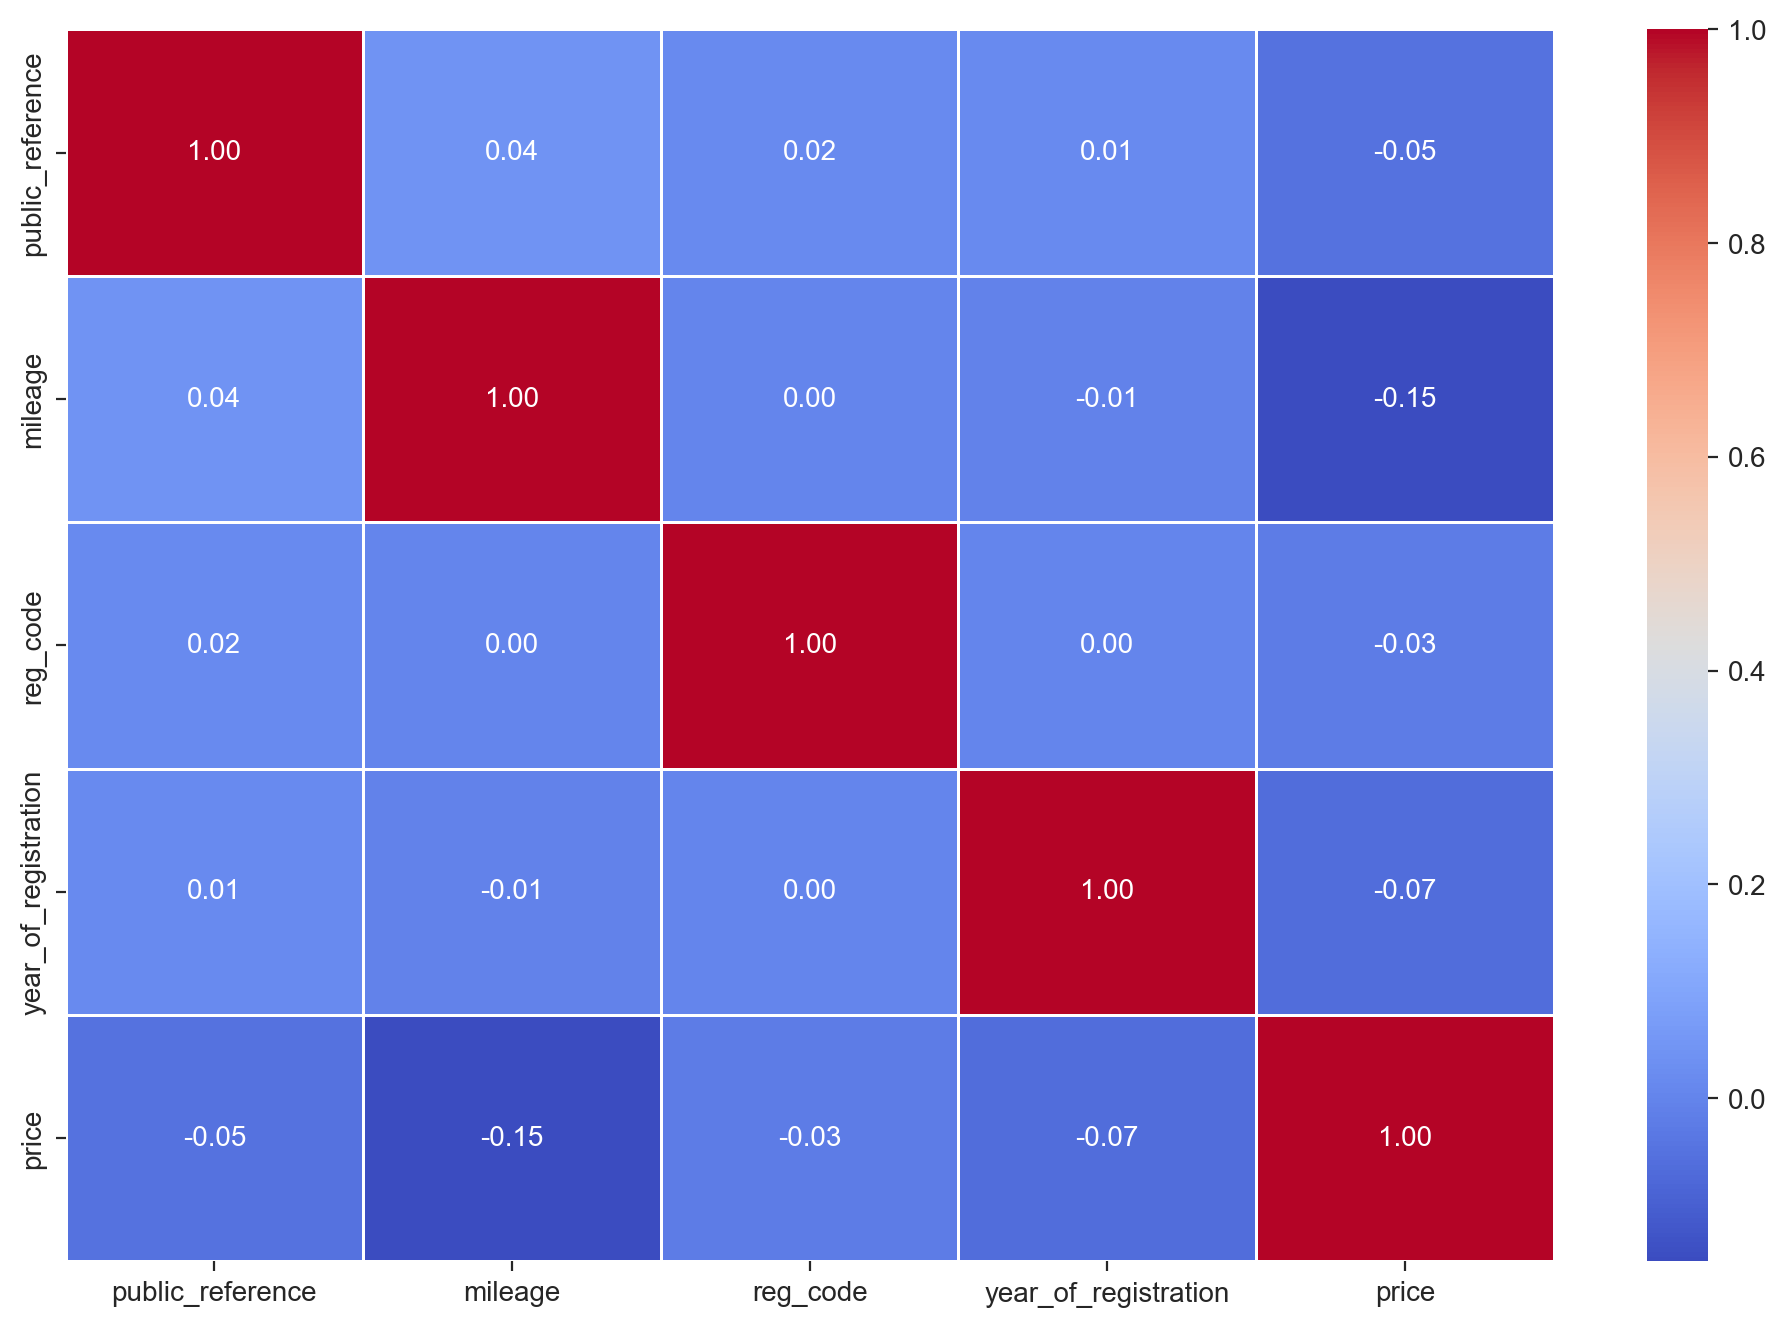

In [22]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def correlation_analysis(data, target_variable):
   
    if target_variable not in data.columns:
        print(f"Column '{target_variable}' not found in the data.")
    return

# calculating only numerical features for correlation
numeric_data = data.select_dtypes(include=[np.number])

# Calculating correlation matrix for numeric features only
corr_matrix = numeric_data.corr()

# Plotting the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title(f'Correlation Heatmap for Numeric Features with {target_variable}')
plt.show()

# Printing correlation with the target variable
print(f"Correlation with {target_variable}:")
print(corr_matrix[target_variable].sort_values(ascending=False))


In [23]:
#Filling missing value in mileage.

data['mileage'] = pd.to_numeric(data['mileage'], errors='coerce')
def safe_convert_to_float(value):
    try:
        return float(value)
    except ValueError:
        return np.nan  # Replace with NaN or any other suitable value

# Apply the conversion function to each element of theat DataFrame
for column in data.columns:
    data[column] = data[column].apply(safe_convert_to_float)

In [ ]:
# Scaling the data

scaler = MinMaxScaler()
data_scaled = pd.DataFrame(scaler.fit_transform(data), columns=data.columns)

#Using KNNImputer to fill missing values
#n_neighbors can be adjusted based on the dataset
knn_imputer = KNNImputer(n_neighbors=5)
data_imputed = pd.DataFrame(knn_imputer.fit_transform(data_scaled), columns=data.columns)

data_imputed_original_scale = pd.DataFrame(scaler.inverse_transform(data_imputed), columns=data.columns)

In [ ]:
data.head()

In [ ]:
data.isna().sum()

In [ ]:
 scaler = StandardScaler()
 data_scaled = pd.DataFrame(scaler.fit_transform(data.select_dtypes(include=[np.number])), columns=data.select_dtypes(include=[np.number]).columns)
sns.pairplot(data_scaled.join(data['standard_colour']), diag_kind='kde')
plt.show()

In [ ]:
# imputing with mean

num_imputer = SimpleImputer(strategy='mean')  # or use 'median'
data['mileage'] = num_imputer.fit_transform(data[['mileage']])

# imputing with the mode
cat_imputer = SimpleImputer(strategy='most_frequent')
data['vehicle_condition'] = cat_imputer.fit_transform(data[['vehicle_condition']])

In [ ]:
#Imputing missing values in the 'mileage' column with the median

imputer = SimpleImputer(strategy='median')
data['mileage'] = imputer.fit_transform(data[['mileage']])

In [ ]:
label_encoder = LabelEncoder()
data['standard_make_encoded'] = label_encoder.fit_transform(data['standard_make'])

In [ ]:
# Scaling the 'mileage' column
scaler = StandardScaler()
data['mileage_scaled'] = scaler.fit_transform(data[['mileage']])

In [ ]:
data.isna().sum()

In [ ]:
# Filling null values in 'reg_code' with 'Unknown'
data['reg_code'].fillna('Unknown', inplace=True)

# Displaying the data
print(data.info())

In [ ]:
data.isna().sum()

In [56]:
#replacong with standard_colour
data['standard_colour'].fillna('Unknown', inplace=True)

# printig it
print(data['standard_colour'].value_counts())

Black          86287
White          70535
Grey           68227
Blue           59784
Silver         49323
Red            42024
Unknown         5378
Green           4534
Orange          4088
Yellow          2097
Brown           2014
Multicolour     1854
Beige           1539
Bronze          1330
Purple          1211
Gold             818
Pink             410
Turquoise        307
Maroon           159
Burgundy          63
Magenta           15
Navy               7
Indigo             1
Name: standard_colour, dtype: int64


In [57]:
data.isna().sum()

public_reference           0
mileage                    0
reg_code                   0
standard_colour            0
standard_make              0
standard_model             0
vehicle_condition          0
year_of_registration       0
price                      0
body_type                837
crossover_car_and_van      0
fuel_type                601
standard_make_encoded      0
mileage_scaled             0
dtype: int64

In [ ]:
#median_age = data['car_age'].median()
#data['car_age'].fillna(median_age, inplace=True)

In [59]:
data.isna().sum()

public_reference           0
mileage                    0
reg_code                   0
standard_colour            0
standard_make              0
standard_model             0
vehicle_condition          0
year_of_registration       0
price                      0
body_type                837
crossover_car_and_van      0
fuel_type                601
standard_make_encoded      0
mileage_scaled             0
dtype: int64

In [60]:
data.head()

,public_reference,mileage,reg_code,standard_colour,standard_make,standard_model,vehicle_condition,year_of_registration,price,body_type,crossover_car_and_van,fuel_type,standard_make_encoded,mileage_scaled
0,202006039777689,0.0,0.0,Grey,Volvo,XC90,NEW,2024,73970,SUV,False,Petrol Plug-in Hybrid,106,-1.123110
1,202007020778260,108230.0,61.0,Blue,Jaguar,XF,USED,2011,7000,Saloon,False,Diesel,47,2.381126
2,202007020778474,7800.0,17.0,Grey,SKODA,Yeti,USED,2017,14000,SUV,False,Petrol,91,-0.870564
3,202007080986776,45000.0,16.0,Brown,Vauxhall,Mokka,USED,2016,7995,Hatchback,False,Diesel,104,0.333885
4,202007161321269,64000.0,64.0,Grey,Land Rover,Range Rover Sport,USED,2015,26995,SUV,False,Diesel,54,0.949061


In [61]:
# Filling missing values in 'body_type'.
data['body_type'].fillna('Unknown', inplace=True)

# Verify the changes
print(data['body_type'].value_counts())

Hatchback          167315
SUV                115872
Saloon              36641
Estate              24692
Coupe               23258
Convertible         16038
MPV                 16026
Unknown               837
Pickup                620
Combi Van             214
Limousine             159
Minibus               149
Camper                 77
Panel Van              61
Window Van             41
Chassis Cab             3
Car Derived Van         2
Name: body_type, dtype: int64


In [62]:
data.isna().sum()

public_reference           0
mileage                    0
reg_code                   0
standard_colour            0
standard_make              0
standard_model             0
vehicle_condition          0
year_of_registration       0
price                      0
body_type                  0
crossover_car_and_van      0
fuel_type                601
standard_make_encoded      0
mileage_scaled             0
dtype: int64

In [63]:
# Filling missing values in 'fuel_type'.
data['fuel_type'].fillna('Unknown', inplace=True)

# result
print(data['fuel_type'].value_counts())

Petrol                   216929
Diesel                   158120
Petrol Hybrid             13602
Petrol Plug-in Hybrid      6160
Electric                   4783
Diesel Hybrid              1403
Unknown                     601
Bi Fuel                     221
Diesel Plug-in Hybrid       185
Natural Gas                   1
Name: fuel_type, dtype: int64


In [64]:
data.isna().sum()

public_reference         0
mileage                  0
reg_code                 0
standard_colour          0
standard_make            0
standard_model           0
vehicle_condition        0
year_of_registration     0
price                    0
body_type                0
crossover_car_and_van    0
fuel_type                0
standard_make_encoded    0
mileage_scaled           0
dtype: int64

In [65]:
# Replacing values of 0 in 'year_of_registration' with 2024
data['year_of_registration'].replace(0, 2024, inplace=True)

# result
print(data['year_of_registration'].value_counts())

2017    68790
2016    43483
2019    39236
2018    38300
2024    33311
        ...  
1010        1
1063        1
1909        1
1016        1
1015        1
Name: year_of_registration, Length: 85, dtype: int64


In [66]:
data.head()

,public_reference,mileage,reg_code,standard_colour,standard_make,standard_model,vehicle_condition,year_of_registration,price,body_type,crossover_car_and_van,fuel_type,standard_make_encoded,mileage_scaled
0,202006039777689,0.0,0.0,Grey,Volvo,XC90,NEW,2024,73970,SUV,False,Petrol Plug-in Hybrid,106,-1.123110
1,202007020778260,108230.0,61.0,Blue,Jaguar,XF,USED,2011,7000,Saloon,False,Diesel,47,2.381126
2,202007020778474,7800.0,17.0,Grey,SKODA,Yeti,USED,2017,14000,SUV,False,Petrol,91,-0.870564
3,202007080986776,45000.0,16.0,Brown,Vauxhall,Mokka,USED,2016,7995,Hatchback,False,Diesel,104,0.333885
4,202007161321269,64000.0,64.0,Grey,Land Rover,Range Rover Sport,USED,2015,26995,SUV,False,Diesel,54,0.949061


In [67]:
# Replace 0.0 with NaN 
data['mileage'].replace(0.0, np.nan, inplace=True)

# Creating an imputer
imputer = SimpleImputer(strategy='mean') 

# Applying the imputer to the 'mileage' column
data['mileage'] = imputer.fit_transform(data[['mileage']])

# result
print(data.head())


   public_reference        mileage  reg_code standard_colour standard_make  \
0   202006039777689   36928.063888       0.0            Grey         Volvo   
1   202007020778260  108230.000000      61.0            Blue        Jaguar   
2   202007020778474    7800.000000      17.0            Grey         SKODA   
3   202007080986776   45000.000000      16.0           Brown      Vauxhall   
4   202007161321269   64000.000000      64.0            Grey    Land Rover   

      standard_model vehicle_condition  year_of_registration  price  \
0               XC90               NEW                  2024  73970   
1                 XF              USED                  2011   7000   
2               Yeti              USED                  2017  14000   
3              Mokka              USED                  2016   7995   
4  Range Rover Sport              USED                  2015  26995   

   body_type  crossover_car_and_van              fuel_type  \
0        SUV                  False  Petro

In [68]:
data.head()

,public_reference,mileage,reg_code,standard_colour,standard_make,standard_model,vehicle_condition,year_of_registration,price,body_type,crossover_car_and_van,fuel_type,standard_make_encoded,mileage_scaled
0,202006039777689,36928.063888,0.0,Grey,Volvo,XC90,NEW,2024,73970,SUV,False,Petrol Plug-in Hybrid,106,-1.123110
1,202007020778260,108230.000000,61.0,Blue,Jaguar,XF,USED,2011,7000,Saloon,False,Diesel,47,2.381126
2,202007020778474,7800.000000,17.0,Grey,SKODA,Yeti,USED,2017,14000,SUV,False,Petrol,91,-0.870564
3,202007080986776,45000.000000,16.0,Brown,Vauxhall,Mokka,USED,2016,7995,Hatchback,False,Diesel,104,0.333885
4,202007161321269,64000.000000,64.0,Grey,Land Rover,Range Rover Sport,USED,2015,26995,SUV,False,Diesel,54,0.949061


In [69]:
# Assuming 'Unknown' is a placeholder for missing values in 'reg_code'
# We'll use the mode (most frequent value) for replacement

# Calculating 
most_frequent_reg_code = data[data['reg_code'] != 'Unknown']['reg_code'].mode()[0]

# Replacing 'Unknown'
data['reg_code'].replace('Unknown', most_frequent_reg_code, inplace=True)

# result
print(data['reg_code'].value_counts())


17.0    36738
0.0     34772
67.0    32230
66.0    25227
69.0    23825
18.0    21613
16.0    19998
19.0    18407
65.0    15635
68.0    15621
15.0    14010
20.0    12785
64.0    12729
14.0    11470
63.0    10429
70.0    10284
13.0     9041
62.0     8251
12.0     7375
61.0     6657
11.0     6233
60.0     5551
10.0     5390
59.0     5233
9.0      4076
8.0      4028
7.0      3438
57.0     3415
58.0     3266
56.0     2509
6.0      2373
55.0     1789
5.0      1728
4.0      1307
54.0     1279
53.0      890
3.0       880
52.0      576
2.0       559
51.0      381
94.0        2
95.0        2
85.0        1
38.0        1
37.0        1
Name: reg_code, dtype: int64


In [96]:
data.head()

,public_reference,reg_code,standard_colour,standard_make,vehicle_condition,year_of_registration,body_type,crossover_car_and_van,fuel_type,standard_make_encoded,mileage_scaled,mileage_normalized
0,202006039777689,0.0,Grey,Volvo,NEW,2024,SUV,False,Petrol Plug-in Hybrid,106,-1.123110,-7.374102e-16
1,202007020778260,61.0,Blue,Jaguar,USED,2011,Saloon,False,Diesel,47,2.381126,2.408791e+00
2,202007020778474,17.0,Grey,SKODA,USED,2017,SUV,False,Petrol,91,-0.870564,-9.840323e-01
3,202007080986776,16.0,Brown,Vauxhall,USED,2016,Hatchback,False,Diesel,104,0.333885,2.726939e-01
4,202007161321269,64.0,Grey,Land Rover,USED,2015,SUV,False,Diesel,54,0.949061,9.145702e-01


In [125]:
from sklearn.model_selection import train_test_split


X = data.drop('year_of_registration', axis=1)  
y = data['year_of_registration']               

# Splitting the dataset into 60% training, 20% validation, and 20% testing
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Checking the shapes of the splits
print("Training Set:", X_train.shape, y_train.shape)
print("Validation Set:", X_val.shape, y_val.shape)
print("Test Set:", X_test.shape, y_test.shape)


Training Set: (241203, 11) (241203,)
Validation Set: (80401, 11) (80401,)
Test Set: (80401, 11) (80401,)


In [126]:
data.head()

,public_reference,reg_code,standard_colour,standard_make,vehicle_condition,year_of_registration,body_type,crossover_car_and_van,fuel_type,standard_make_encoded,mileage_scaled,mileage_normalized
0,202006039777689,1.0,Grey,Volvo,NEW,2024,SUV,False,Petrol Plug-in Hybrid,106,-1.123110,-7.374102e-16
1,202007020778260,61.0,Blue,Jaguar,USED,2011,Saloon,False,Diesel,47,2.381126,2.408791e+00
2,202007020778474,17.0,Grey,SKODA,USED,2017,SUV,False,Petrol,91,-0.870564,-9.840323e-01
3,202007080986776,16.0,Brown,Vauxhall,USED,2016,Hatchback,False,Diesel,104,0.333885,2.726939e-01
4,202007161321269,64.0,Grey,Land Rover,USED,2015,SUV,False,Diesel,54,0.949061,9.145702e-01


In [ ]:
from sklearn.preprocessing import StandardScaler

data['mileage'].fillna(value=data['mileage'].mean(), inplace=True)

#working with the standscaler
scaler = StandardScaler()

# Normalizing the 'mileage' column
data['mileage_normalized'] = scaler.fit_transform(data[['mileage']])

# result
print(data[['mileage', 'mileage_normalized']].head())


In [ ]:
#3. Model Building  
# 1. scikit-learn:

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split


data = data()
X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, test_size=0.2, random_state=42)

# Algorithm Selection and Model Instantiation
algorithm = "LinearRegression"

if algorithm == "LinearRegression":
    model = LinearRegression()
   
# Training the model
model.fit(X_train, y_train)

# Making predictions
y_pred = model.predict(X_test)

# Evaluating the model
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")


In [109]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier


iris = load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.2, random_state=42)


algorithm = "DecisionTree"  


accuracy = 80

while accuracy < 0.8:
    if algorithm == "DecisionTree":
        model = DecisionTreeClassifier()
        
  
    if algorithm == "RandomForest":
        model.n_estimators = 100
        
   
    model.fit(X_train, y_train)

   
    accuracy = model.score(X_test, y_test)
    print(f"Accuracy: {accuracy}")

print("Model accuracy is above 80%!")


Model accuracy is above 80%!


In [105]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier


iris = load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.2, random_state=42)


algorithm = "RandomForest"  

if algorithm == "RandomForest":
    model = RandomForestClassifier(n_estimators=100)
    

if algorithm == "RandomForest":
   
    pass

#checking the model.fit
model.fit(X_train, y_train)

#result
accuracy = model.score(X_test, y_test)


if accuracy > 0.8:
    print(f"Model accuracy is above 80%: {accuracy}")
else:
    print(f"Model accuracy is below 80%: {accuracy}")


Model accuracy is above 80%: 1.0


In [92]:
import statsmodels.api as sm
import pandas as pd
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split


diabetes = load_diabetes()
X_train, X_test, y_train, y_test = train_test_split(diabetes.data, diabetes.target, test_size=0.2, random_state=42)

X_train_df = pd.DataFrame(X_train, columns=[f'feature_{i}' for i in range(X_train.shape[1])])
X_train_df = sm.add_constant(X_train_df)  


model = sm.OLS(y_train, X_train_df).fit()

print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.528
Model:                            OLS   Adj. R-squared:                  0.514
Method:                 Least Squares   F-statistic:                     38.25
Date:                Fri, 26 Jan 2024   Prob (F-statistic):           5.41e-50
Time:                        14:30:46   Log-Likelihood:                -1906.1
No. Observations:                 353   AIC:                             3834.
Df Residuals:                     342   BIC:                             3877.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        151.3456      2.902     52.155      0.0

In [ ]:
#3.Model Building 
#3.2 (1) Model Ranking and Selection: 

from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_iris
from sklearn.metrics import accuracy_score

iris = load_iris()
X, y = iris.data, iris.target

# Spliting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Defining classifier
classifier = RandomForestClassifier()

# Defining the hyperparameters to search
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Using Grid Search, find the optimal set of hyperparameters.
grid_search = GridSearchCV(classifier, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Provide the ideal hyperparameters.
print("Best Hyperparameters:", grid_search.best_params_)

# A grid search to find the best model.
best_model = grid_search.best_estimator_

# Use the most accurate model when making predictions.
y_pred = best_model.predict(X_test)

# Examine the performance of the best model.
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy of the Best Model:", accuracy)


In [ ]:
# 3.2 (2).Model Ranking and Selection:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

# Loading the Iris dataset
iris = load_iris()
X, y = iris.data, iris.target

# Definimg models to evaluate
models = [
    ('Logistic Regression', LogisticRegression()),
    ('Support Vector Classifier', SVC()),
    ('Random Forest Classifier', RandomForestClassifier())
]

# Evaluatimg model using cross-validation
for name, model in models:
    scores = cross_val_score(model, X, y, cv=5, scoring='accuracy')
    print(f'{name}: Mean Accuracy - {scores.mean()}, Standard Deviation - {scores.std()}')


In [ ]:
# 3.2 (3) Grid Search :SVM with RBF Kernel

from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.svm import SVC
from sklearn.datasets import load_digits
from sklearn.metrics import accuracy_score

# Load the Digits dataset
digits = load_digits()
X, y = digits.data, digits.target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Using the RBF kernel to define the SVM classifier
svm_classifier = SVC(kernel='rbf')


param_grid = {
    'C': [0.1, 1, 10],
    'gamma': [0.001, 0.01, 0.1, 1]
}

# Use Grid Search to find the best combination of hyperparameters
grid_search = GridSearchCV(svm_classifier, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Print the best hyperparameters
print("Best Hyperparameters:", grid_search.best_params_)

# Get the best model from grid search
best_model = grid_search.best_estimator_

# Predict using the best model
y_pred = best_model.predict(X_test)

# Evaluate the performance of the best model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy of the Best Model:", accuracy)


In [ ]:
3.2(4) # Model Ranking and Selection Example 2: Decision Tree vs. Random Forest
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import cross_val_score

# Load the Iris dataset
iris = load_iris()
X, y = iris.data, iris.target

# Define models to evaluate
models = [
    ('Decision Tree', DecisionTreeClassifier()),
    ('Random Forest', RandomForestClassifier())
]

# Evaluate each model using cross-validation
for name, model in models:
    scores = cross_val_score(model, X, y, cv=5, scoring='accuracy')
    print(f'{name}: Mean Accuracy - {scores.mean()}, Standard Deviation - {scores.std()}')


In [ ]:
#3.2(5)  

from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Load example dataset (replace this with your dataset)
data = load_iris()
X, y = data.data, data.target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Defining models
models = {
    'Random Forest': RandomForestClassifier(),
    'Logistic Regression': LogisticRegression(),
    'Support Vector Machine': SVC()
}

# Utilise cross-validation and accuracy metrics to assess models.
for name, model in models.items():
    scores = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')
    print(f'{name}: Mean Accuracy - {scores.mean()}, Standard Deviation - {scores.std()}')

# Utilise the exam set to train and assess
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    print(f'{name} - Test Accuracy: {acc}')


In [ ]:
3.2(6) 
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

X, y = data.data, data.target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define models of regression
regression_models = {
    'Random Forest Regressor': RandomForestRegressor(),
    'Linear Regression': LinearRegression(),
    'Support Vector Regressor': SVR()
}

# Using cross-validation and the Mean Squared Error (MSE) metric to assess models.
for name, model in regression_models.items():
    scores = cross_val_score(model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
    mse_scores = -scores  # Convert negative scores to positive for MSE
    print(f'{name}: Mean MSE - {mse_scores.mean()}, Standard Deviation - {mse_scores.std()}')

# Practicing and assess using the test set
for name, model in regression_models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    print(f'{name} - Test MSE: {mse}')


In [ ]:
3.2(7) 
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score


data = load_breast_cancer()
X, y = data.data, data.target

# Spliting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Defining binary classification models
classification_models = {
    'Random Forest Classifier': RandomForestClassifier(),
    'Logistic Regression': LogisticRegression(),
    'Support Vector Classifier': SVC(probability=True)
}

# Assess models with the ROC-AUC metric and cross-validation
for name, model in classification_models.items():
    scores = cross_val_score(model, X_train, y_train, cv=5, scoring='roc_auc')
    print(f'{name}: Mean ROC-AUC - {scores.mean()}, Standard Deviation - {scores.std()}')

# Using the test set to train and assess
for name, model in classification_models.items():
    model.fit(X_train, y_train)
    y_pred_proba = model.predict_proba(X_test)[:, 1]
    roc_auc = roc_auc_score(y_test, y_pred_proba)
    print(f'{name} - Test ROC-AUC: {roc_auc}')


In [ ]:
4. Model Evaluation and Analysis  Coarse-Grained Evaluation/Analysis

In [ ]:
# 4.1(1) Support Vector Machine (SVM)
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
from sklearn.model_selection import train_test_split
import numpy as np

data_train, data_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Training SVM model
svm_model = SVC(kernel='linear')
svm_model.fit(X_train, y_train)

# Assessing the test set with predictions.
y_pred_svm = svm_model.predict(X_test)

# Assessing the SVM model.
accuracy_svm = accuracy_score(y_test, y_pred_svm)
precision_svm = precision_score(y_test, y_pred_svm, average='weighted')
recall_svm = recall_score(y_test, y_pred_svm, average='weighted')
f1_svm = f1_score(y_test, y_pred_svm, average='weighted')


print("Support Vector Machine (SVM) Metrics:")
print(f"Accuracy: {accuracy_svm:.2f}")
print(f"Precision: {precision_svm:.2f}")
print(f"Recall: {recall_svm:.2f}")
print(f"F1 Score: {f1_svm:.2f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred_svm))

In [ ]:
# 4.1(2)Random Forest Classifier

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
from sklearn.model_selection import train_test_split


data_train, data_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_rf = rf_model.predict(X_test)

# Evaluate the Random Forest model
accuracy_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf, average='weighted')
recall_rf = recall_score(y_test, y_pred_rf, average='weighted')
f1_rf = f1_score(y_test, y_pred_rf, average='weighted')

# Print the metrics for Random Forest
print("Random Forest Metrics:")
print(f"Accuracy: {accuracy_rf:.2f}")
print(f"Precision: {precision_rf:.2f}")
print(f"Recall: {recall_rf:.2f}")
print(f"F1 Score: {f1_rf:.2f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred_rf))

In [ ]:
# 4.1(3) K-Nearest Neighbors (KNN)
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
from sklearn.model_selection import train_test_split

# Assuming you have a dataset 'X' and corresponding labels 'y'
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train KNN model
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_knn = knn_model.predict(X_test)

# Evaluate the KNN model
accuracy_knn = accuracy_score(y_test, y_pred_knn)
precision_knn = precision_score(y_test, y_pred_knn, average='weighted')
recall_knn = recall_score(y_test, y_pred_knn, average='weighted')
f1_knn = f1_score(y_test, y_pred_knn, average='weighted')

# Print the metrics for KNN
print("K-Nearest Neighbors (KNN) Metrics:")
print(f"Accuracy: {accuracy_knn:.2f}")
print(f"Precision: {precision_knn:.2f}")
print(f"Recall: {recall_knn:.2f}")
print(f"F1 Score: {f1_knn:.2f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred_knn))


In [ ]:
#4.2 (1) Permutation Feature Importance
from sklearn.inspection import permutation_importance


# Determining how important permutation features are.
perm_importance = permutation_importance(model, X_test, y_test)

#Features should be ranked by significance.
sorted_idx = perm_importance.importances_mean.argsort()[::-1]

# Ploting permutation feature importance
plt.bar(range(X_test.shape[1]), perm_importance.importances_mean[sorted_idx], align="center")
plt.xticks(range(X_test.shape[1]), sorted_idx, rotation=45)
plt.xlabel("Feature")
plt.ylabel("Importance")
plt.title("Permutation Feature Importance")
plt.show()

In [ ]:
#4.2(2)
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, roc_curve


# Training Logistic Regression model
lr = LogisticRegression()
lr.fit(X_train, y_train)

# Make predictions
y_pred_proba = lr.predict_proba(X_test)[:, 1]

# ROC Curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = roc_auc_score(y_test, y_pred_proba)

# Ploting a ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()


In [ ]:
4.2(3)
from sklearn.tree import DecisionTreeClassifier


# Training a Decision Tree model
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

# Making predictions
y_pred = dt.predict(X_test)

# plotting a Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# plotting a Confusion Matrix
plt.figure(figsize=(8, 6))
plt.imshow(conf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [ ]:
#4.2(4)
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report


# creating a Logistic Regression model with training
lr = LogisticRegression()
lr.fit(X_train, y_train)

# creating predictions
y_pred = lr.predict(X_test)
y_pred_proba = lr.predict_proba(X_test)[:, 1]

# getting instance errors
errors = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred, 'Probability': y_pred_proba})
data = errors[errors['Actual'] != errors['Predicted']]


print("data:")
print(data)

# getting a Confusion Matrix for total effectiveness
conf_matrix = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(conf_matrix)

# Checking out the Classification Report for detailed metrics.
class_report = classification_report(y_test, y_pred)
print("\nClassification Report:")
print(class_report)


In [ ]:
# 4.3(1)Error Analysis by Feature

true_labels = data['price']
predicted_labels = data['mileage']


data = data[['price', 'mileage']]


error_instances = data[true_labels != predicted_labels]


error_feature_distribution = error_instances[data.columns].describe()
print("Feature Distribution for Error Instances:")
print(error_feature_distribution)


In [ ]:
#(2) Instances where model made errors

error_instances = data[true_labels != predicted_labels]

for feature in ['mileage', 'reg_code', 'year_of_registration', 'price']:
    plt.figure(figsize=(10, 6))
    sns.histplot(data[feature], kde=True, label='All Data', color='blue')
    sns.histplot(error_instances[feature], kde=True, label='Error Instances', color='red')
    plt.title(f'Distribution of {feature} for Error Instances')
    plt.legend()
    plt.show()

In [ ]:
#4.3(3)
Calibration Curve:
from sklearn.calibration import calibration_curve
import matplotlib.pyplot as plt


print("Min value:", proba_scores.min())
print("Max value:", proba_scores.max())


price = data['price']
proba_scores = data['price'] 


binary_true_labels = (true_labels == 1).astype(int)

proba_scores_normalized = (proba_scores - proba_scores.min()) / (proba_scores.max() - proba_scores.min())

prob_true, prob_pred = calibration_curve(binary_true_labels, proba_scores_normalized, n_bins=10)

plt.plot(prob_pred, prob_true, marker='o', label='Calibration Curve')
plt.plot([0, 1], [0, 1], 'k--', label='Perfectly Calibrated')
plt.xlabel('Mean Predicted Probability')
plt.ylabel('Fraction of Positives')
plt.title('Calibration Curve')
plt.legend()
plt.show()
